<a href="https://colab.research.google.com/github/Chubbyman2/Resume/blob/master/Handwritten_Digits_Guesser_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
tf.__version__
!pip install h5py pyyaml

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Display the first number
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

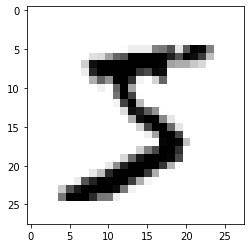

In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [5]:
# Reshape for CNN - default shape is (28, 28)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize array values to between 0-1
x_train = x_train/255
x_test = x_test/255

In [15]:
digit_guesser = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(1, 1), input_shape=(28, 28, 1), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [16]:
digit_guesser.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
digit_guesser.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [21]:
checkpoint_dir = "./training_checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

# Checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                                         save_weights_only=True,
                                                         verbose=1)
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

history = digit_guesser.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, callbacks=[early_stopping, checkpoint_callback])

Epoch 1/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9922
Epoch 00001: saving model to ./training_checkpoints/ckpt_1
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.0903 - val_accuracy: 0.9785
Epoch 2/20
1859/1875 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9925
Epoch 00002: saving model to ./training_checkpoints/ckpt_2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9925 - val_loss: 0.0942 - val_accuracy: 0.9793
Epoch 3/20
1858/1875 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9929
Epoch 00003: saving model to ./training_checkpoints/ckpt_3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.1094 - val_accuracy: 0.9755
Epoch 4/20
1852/1875 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9933
Epoch 00004: saving model to ./t

In [25]:
digit_guesser.save("digit_guesser.model")

INFO:tensorflow:Assets written to: digit_guesser.model/assets


In [44]:
# Final test
digit_guesser = tf.keras.models.load_model("digit_guesser.model")
digit_guesser.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

prediction = digit_guesser.predict([x_test])

def check_prediction(n):
  if np.argmax(prediction[n]) == y_test[n]:
    print(f"Correct value guessed: {np.argmax(prediction[0])} \nYay!")
  else:
    print(f"Incorrect value guessed. \nPrediction: {np.argmax(prediction[n])} \nActual: {y_test[n]}")

check_prediction(0)

Correct value guessed: 7 
Yay!


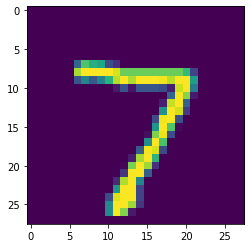

In [32]:
plt.imshow(np.reshape(x_test[0], (28, 28)))
plt.show()